# Explore the whole dataset
https://www.kaggle.com/c/dog-breed-identification/data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

# your own utils function
from src.utils import plot_image_grid

%matplotlib inline

## Structure of the data folder

In [2]:
! tree -L 1 data

data
├── labels.csv
├── sample_submission.csv
├── test
├── test.zip
├── train
└── train.zip

2 directories, 4 files


## Labels

In [3]:
labels = pd.read_csv('data/labels.csv')
print(labels.shape)
display(labels.head())

(10222, 2)


id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

### value counts of dog breeds

In [4]:
breed_count = labels.groupby('breed', as_index=False).agg({'id': 'count'}).rename(
    columns={'id': 'count'}).sort_values('count', ascending=False).reset_index(drop=False)
display(breed_count.head())
print(breed_count.shape)

index                 breed  count
0     97    scottish_deerhound    126
1     73           maltese_dog    117
2      1          afghan_hound    116
3     42           entlebucher    115
4     11  bernese_mountain_dog    114

(120, 3)


### visualize breed distribution
The dataset is small and the classes are imbalanced.

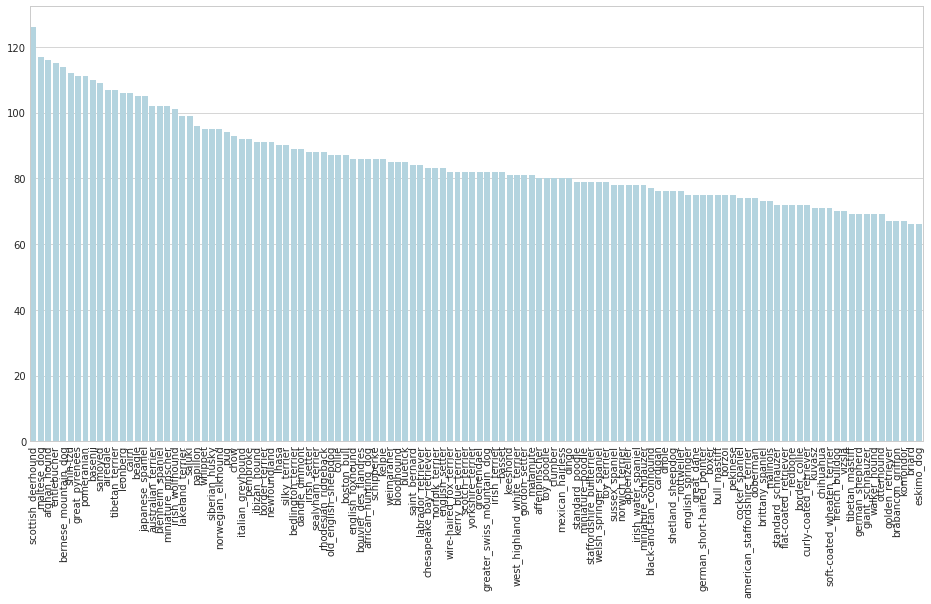

In [5]:
sns.set_style('whitegrid')
plt.figure(figsize=(16, 8))
_ = sns.barplot(x=np.arange(breed_count.shape[0]), y=breed_count['count'].values, color='lightblue')
_ = plt.xticks(range(breed_count.shape[0]), breed_count['breed'].values, rotation=90)

## check sample_submission

In [6]:
sample_submission = pd.read_csv('data/sample_submission.csv')

print(sample_submission.shape)
display(sample_submission.head())

(10357, 121)


id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e       0.008333      0.008333   
1  00102ee9d8eb90812350685311fe5890       0.008333      0.008333   
2  0012a730dfa437f5f3613fb75efcd4ce       0.008333      0.008333   
3  001510bc8570bbeee98c8d80c8a95ec1       0.008333      0.008333   
4  001a5f3114548acdefa3d4da05474c2e       0.008333      0.008333   

   african_hunting_dog  airedale  american_staffordshire_terrier  appenzeller  \
0             0.008333  0.008333                        0.008333     0.008333   
1             0.008333  0.008333                        0.008333     0.008333   
2             0.008333  0.008333                        0.008333     0.008333   
3             0.008333  0.008333                        0.008333     0.008333   
4             0.008333  0.008333                        0.008333     0.008333   

   australian_terrier   basenji    basset        ...          toy_poodle  \
0            0.008333  0.008333  0.008333        ...            0.008333   
1            0.008333  0.008333  0.008333        ...            0.008333   
2            0.008333  0.008333  0.008333        ...            0.008333   
3            0.008333  0.008333  0.008333        ...            0.008333   
4            0.008333  0.008333  0.008333        ...            0.008333   

   toy_terrier    vizsla  walker_hound  weimaraner  welsh_springer_spaniel  \
0     0.008333  0.008333      0.008333    0.008333                0.008333   
1     0.008333  0.008333      0.008333    0.008333                0.008333   
2     0.008333  0.008333      0.008333    0.008333                0.008333   
3     0.008333  0.008333      0.008333    0.008333                0.008333   
4     0.008333  0.008333      0.008333    0.008333                0.008333   

   west_highland_white_terrier   whippet  wire-haired_fox_terrier  \
0                     0.008333  0.008333                 0.008333   
1                     0.008333  0.008333                 0.008333   
2                     0.008333  0.008333                 0.008333   
3                     0.008333  0.008333                 0.008333   
4                     0.008333  0.008333                 0.008333   

   yorkshire_terrier  
0           0.008333  
1           0.008333  
2           0.008333  
3           0.008333  
4           0.008333  

[5 rows x 121 columns]

## explore training set

In [7]:
! ls data/train | head -5

000bec180eb18c7604dcecc8fe0dba07.jpg
001513dfcb2ffafc82cccf4d8bbaba97.jpg
001cdf01b096e06d78e9e5112d419397.jpg
00214f311d5d2247d5dfe4fe24b2303d.jpg
0021f9ceb3235effd7fcde7f7538ed62.jpg
ls: write error: Broken pipe


### visualize training set samples

In [8]:
train_samples = labels.sample(16).reset_index(drop=True)
display(train_samples.head())

id                breed
0  fab782d25875a7cf5298cd2e2aa01cd5           rottweiler
1  a63484a418084bbfd3158505b0bf6f9e  miniature_schnauzer
2  2a4343b91dc55997f868b310f58a542f                boxer
3  146fa113f3d8ad6e0effe9719e09cef1             papillon
4  0d0d0f7c689020c35b83a91e7717624b              clumber

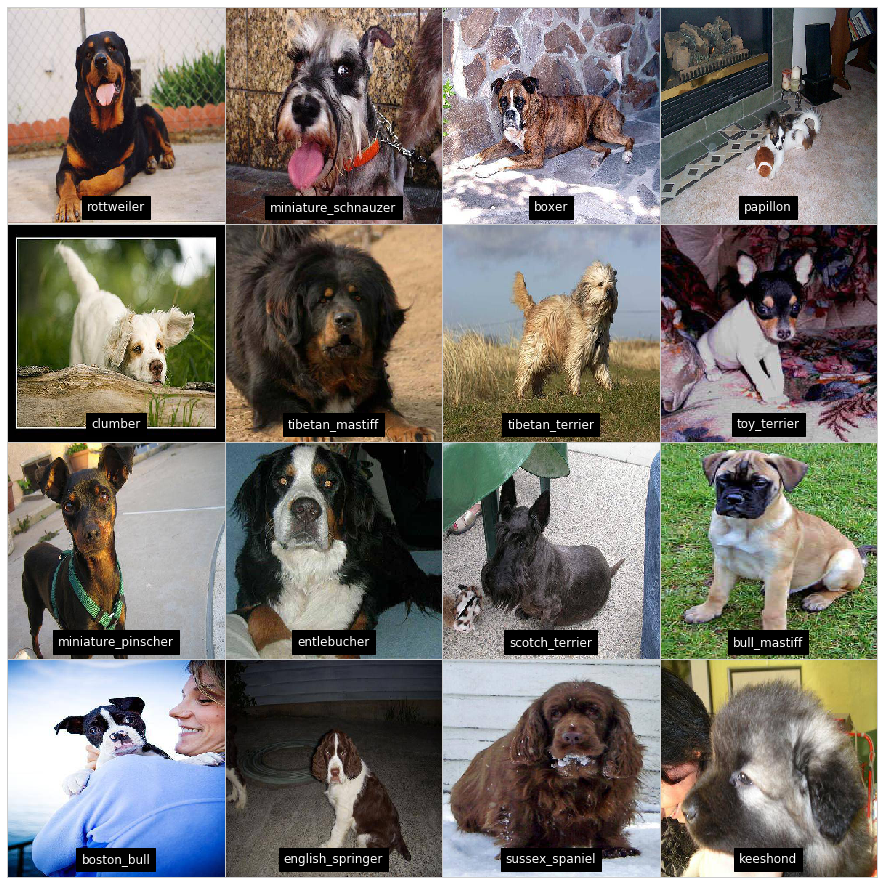

In [9]:
train_grid = plot_image_grid(image_samples=train_samples)

## explore test sets

In [10]:
test_samples = sample_submission.sample(16)

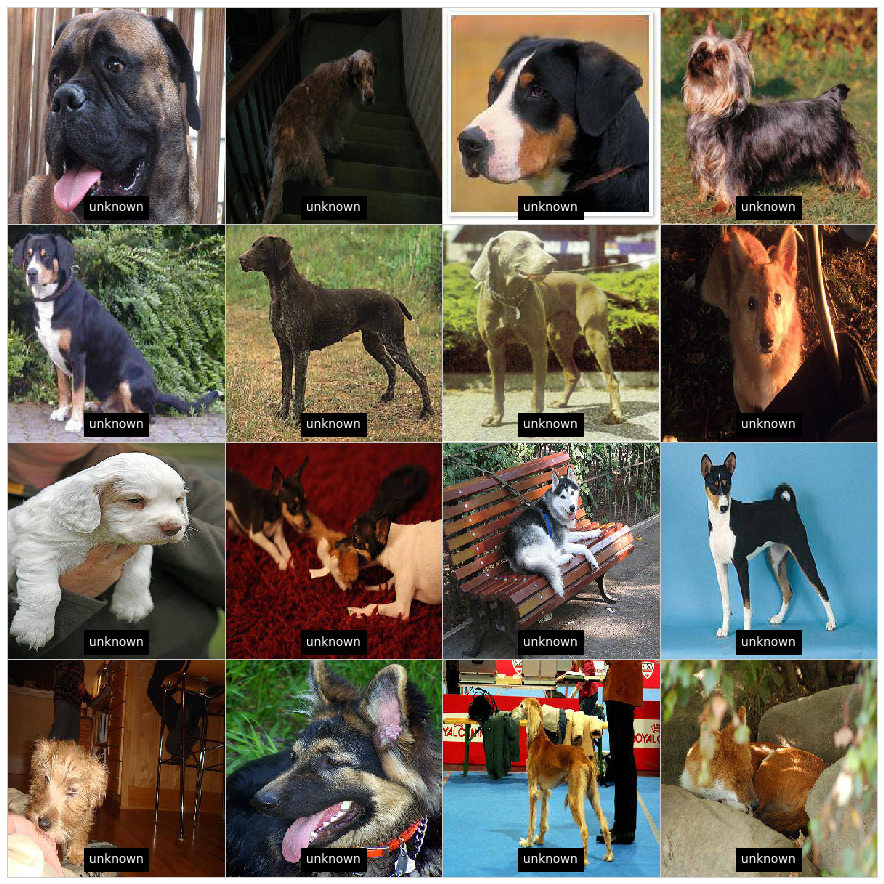

In [11]:
test_grid = plot_image_grid(image_samples=test_samples, train=False)